<a href="https://colab.research.google.com/github/varshakarunya/healthcare-nlp-analytics/blob/main/notebooks/03_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
feedback = [
    "The wait time was extremely long and very frustrating",
    "Doctor explained everything clearly and was very kind",
    "Billing process was confusing and stressful",
    "Scheduling appointments takes too long",
    "The nursing staff was compassionate and professional",
    "Long delays before seeing the doctor",
    "Insurance and billing issues caused frustration",
    "Friendly staff but appointment scheduling was difficult"
]

df = pd.DataFrame({"feedback": feedback})
df

,feedback
0,The wait time was extremely long and very frus...
1,Doctor explained everything clearly and was ve...
2,Billing process was confusing and stressful
3,Scheduling appointments takes too long
4,The nursing staff was compassionate and profes...
5,Long delays before seeing the doctor
6,Insurance and billing issues caused frustration
7,Friendly staff but appointment scheduling was ...


In [3]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=500,
    ngram_range=(1, 2)
)

X_tfidf = tfidf.fit_transform(df["feedback"])

In [4]:
n_topics = 3

nmf = NMF(
    n_components=n_topics,
    random_state=42
)

W = nmf.fit_transform(X_tfidf)
H = nmf.components_

In [5]:
feature_names = tfidf.get_feature_names_out()

def display_topics(model, feature_names, n_top_words=8):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic {topic_idx + 1}:")
        print(", ".join([
            feature_names[i]
            for i in topic.argsort()[:-n_top_words - 1:-1]
        ]))

display_topics(nmf, feature_names)


Topic 1:
long, doctor, seeing, seeing doctor, delays seeing, delays, long delays, kind

Topic 2:
staff, staff compassionate, professional, nursing staff, nursing, compassionate, compassionate professional, scheduling difficult

Topic 3:
billing, stressful, process confusing, process, billing process, confusing stressful, confusing, issues caused


In [6]:
df["dominant_topic"] = W.argmax(axis=1)
df

,feedback,dominant_topic
0,The wait time was extremely long and very frus...,0
1,Doctor explained everything clearly and was ve...,0
2,Billing process was confusing and stressful,2
3,Scheduling appointments takes too long,0
4,The nursing staff was compassionate and profes...,1
5,Long delays before seeing the doctor,0
6,Insurance and billing issues caused frustration,2
7,Friendly staff but appointment scheduling was ...,1


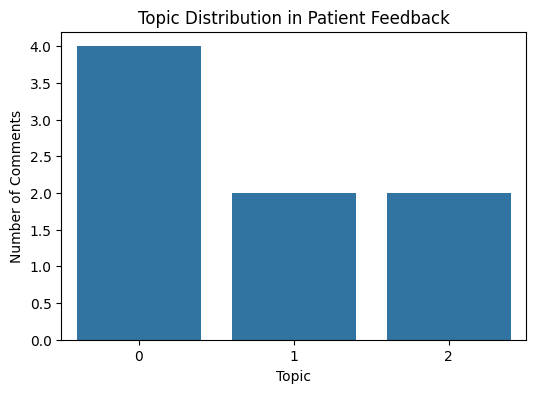

In [7]:
topic_counts = df["dominant_topic"].value_counts().sort_index()

plt.figure(figsize=(6,4))
sns.barplot(
    x=topic_counts.index,
    y=topic_counts.values
)
plt.title("Topic Distribution in Patient Feedback")
plt.xlabel("Topic")
plt.ylabel("Number of Comments")
plt.show()

## Topic Interpretation & Insights

**Topic 1 – Wait Times & Scheduling**
- Keywords related to delays, appointments, and long waits
- Indicates operational inefficiencies in scheduling workflows

**Topic 2 – Staff Experience & Care Quality**
- Highlights positive experiences with doctors and nurses
- Reflects strengths in patient-facing service delivery

**Topic 3 – Billing & Insurance Issues**
- Captures dissatisfaction around billing clarity and insurance handling
- Represents a major driver of negative patient sentiment

### Business Impact
Topic modeling enables healthcare organizations to:
- Prioritize operational improvements
- Identify systemic service bottlenecks
- Support data-driven patient experience initiatives


## Model Limitations

- Small, simulated dataset used for demonstration
- Topics may overlap due to limited text volume
- In production, larger datasets and BERTopic/LDA models would improve topic coherence
